In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd

from time import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from sklearn.externals import joblib

C:\Users\Juanma\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# X_train = []
# y_train = []
# X_test = []
# y_test = []

# tiempoInicio = time()
# count=0
# yourpath = '../imagenes-vacia/'
# for root, dirs, files in os.walk(yourpath, topdown=False):
#     for name in files:
#         if count%10==0:
#             imagen = cv2.imread(yourpath+name)
#             X_test.append(imagen)
#             y_test.append('vacia')
#         else:
#             imagen = cv2.imread(yourpath+name)
#             X_train.append(imagen)
#             y_train.append('vacia')
#         count += 1

# yourpath = '../imagenes-congestionada/'
# for root, dirs, files in os.walk(yourpath, topdown=False):
#     for name in files:
#         if count%10==0:
#             imagen = cv2.imread(yourpath+name)
#             X_test.append(imagen)
#             y_test.append('congestionada')
#         else:
#             imagen = cv2.imread(yourpath+name)
#             X_train.append(imagen)
#             y_train.append('congestionada')
#         count += 1

# yourpath = '../imagenes-atascada/'
# for root, dirs, files in os.walk(yourpath, topdown=False):
#     for name in files:
#         if count%10==0:
#             imagen = cv2.imread(yourpath+name)
#             X_test.append(imagen)
#             y_test.append('atascada')
#         else:
#             imagen = cv2.imread(yourpath+name)
#             X_train.append(imagen)
#             y_train.append('atascada')
#         count += 1
# print("Tiempo final: ",str(time()-tiempoInicio))  # 29.28268814086914

In [3]:
# filename=r'C:\Users\Juanma\Documents\RX_train.sav'
# joblib.dump(X_train,filename)
# filename=r'C:\Users\Juanma\Documents\RX_test.sav'
# joblib.dump(X_test,filename)
# filename=r'C:\Users\Juanma\Documents\Ry_train.sav'
# joblib.dump(y_train,filename)
# filename=r'C:\Users\Juanma\Documents\Ry_test.sav'
# joblib.dump(y_test,filename)

In [4]:
tiempoInicio = time()
tiempo_total_0 = tiempoInicio
sav_X_train = r"C:\Users\Juanma\Documents\RX_train.sav"
X_train = joblib.load(sav_X_train)
sav_y_train = r"C:\Users\Juanma\Documents\Ry_train.sav"
y_train = joblib.load(sav_y_train)
sav_X_test = r"C:\Users\Juanma\Documents\RX_test.sav"
X_test = joblib.load(sav_X_test)
sav_y_test = r"C:\Users\Juanma\Documents\Ry_test.sav"
y_test = joblib.load(sav_y_test)
print("Tiempo final: ",str(time()-tiempoInicio)) #4088 fotos -> 0.24434423446655273 s

Tiempo final:  1.0292751789093018


In [5]:
import matplotlib.pyplot as ply
print('Longitud del conjunto de fotos de train: ',len(X_train))
print('Longitud del conjunto de fotos de test:   ',len(X_test))
print('Tamaño de cada imagen: \t\t\t   ',X_train[0].shape[0],'x',X_train[0].shape[1])
y_train_num = []
y_test_num = []
num_vacia_test=0
num_vacia_train=0
num_congestionada_train=0
num_congestionada_test=0
num_atascada_train=0
num_atascada_test=0
for etiqueta in y_test:
    if etiqueta=='vacia':
        num_vacia_test += 1
        y_test_num.append(0)
    elif etiqueta=='congestionada':
        num_congestionada_test += 1
        y_test_num.append(1)
    elif etiqueta == 'atascada':
        num_atascada_test +=1
        y_test_num.append(2)
for etiqueta in y_train:
    if etiqueta=='vacia':
        num_vacia_train += 1
        y_train_num.append(0)
    elif etiqueta=='congestionada':
        num_congestionada_train += 1
        y_train_num.append(1)
    elif etiqueta == 'atascada':
        num_atascada_train +=1
        y_train_num.append(2)
print('0 - carreteras vacias - ',str(num_vacia_train),'- congestionadas -',
      str(num_vacia_train+num_congestionada_train),'- atascadas -',
      str(num_vacia_train+num_congestionada_train+num_atascada_train))

Longitud del conjunto de fotos de train:  18393
Longitud del conjunto de fotos de test:    2044
Tamaño de cada imagen: 			    56 x 100
0 - carreteras vacias -  5477 - congestionadas - 13002 - atascadas - 18393


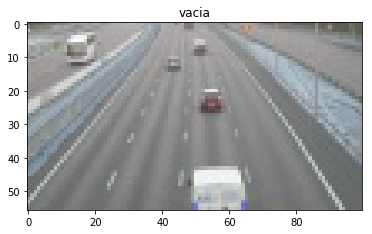

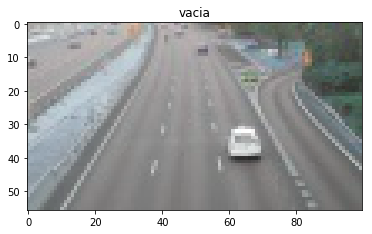

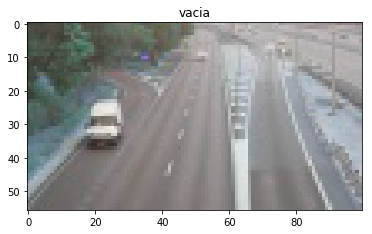

In [6]:
ply.imshow(X_train[10])
ply.title(y_train[10])
ply.show()
ply.imshow(X_train[1611])
ply.title(y_train[1611])
ply.show()
ply.imshow(X_train[2600])
ply.title(y_train[2600])
ply.show()

## Normalizacion de los datos presentes en la foto

In [7]:
X_train = [[[z/255 for z in y] for y in x] for x in X_train]
X_test = [[[z/255 for z in y] for y in x] for x in X_test]

In [8]:
# X_train.shape

In [15]:
# Definimos el modelo
num_classes=3
def gen_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(56,100,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compilamos el modelo
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# # Construimos el modelo
model = gen_model()

In [16]:
model.fit(np.array(X_train), np.array(y_train_num), batch_size=32, epochs=100)

Epoch 1/100
18393/18393 [==============================] - 6s 324us/step - loss: 0.3333 - acc: 0.8640
Epoch 2/100
18393/18393 [==============================] - 6s 324us/step - loss: 0.0231 - acc: 0.9954
Epoch 3/100
18393/18393 [==============================] - 6s 312us/step - loss: 0.0050 - acc: 0.9995
Epoch 4/100
18393/18393 [==============================] - 6s 310us/step - loss: 0.0063 - acc: 0.9983
Epoch 5/100
18393/18393 [==============================] - 6s 313us/step - loss: 0.0097 - acc: 0.9971
Epoch 6/100
18393/18393 [==============================] - 6s 311us/step - loss: 0.0046 - acc: 0.9989
Epoch 7/100
18393/18393 [==============================] - 6s 313us/step - loss: 0.0014 - acc: 0.9997 
Epoch 8/100
18393/18393 [==============================] - 6s 313us/step - loss: 3.2859e-04 - acc: 1.0000
Epoch 9/100
18393/18393 [==============================] - 6s 310us/step - loss: 1.2692e-04 - acc: 1.0000
Epoch 10/100
18393/18393 [==============================] - 6s 315us/step

Epoch 79/100
18393/18393 [==============================] - 6s 309us/step - loss: 1.4128e-04 - acc: 0.9999
Epoch 80/100
18393/18393 [==============================] - 6s 306us/step - loss: 0.0019 - acc: 0.9996
Epoch 81/100
18393/18393 [==============================] - 6s 307us/step - loss: 0.0024 - acc: 0.9992
Epoch 82/100
18393/18393 [==============================] - 6s 306us/step - loss: 7.8658e-04 - acc: 0.9999
Epoch 83/100
18393/18393 [==============================] - 6s 305us/step - loss: 5.0371e-05 - acc: 1.0000
Epoch 84/100
18393/18393 [==============================] - 6s 307us/step - loss: 0.0039 - acc: 0.9992
Epoch 85/100
18393/18393 [==============================] - 6s 310us/step - loss: 2.1265e-05 - acc: 1.0000
Epoch 86/100
18393/18393 [==============================] - 6s 314us/step - loss: 1.0688e-04 - acc: 0.9999
Epoch 87/100
18393/18393 [==============================] - 6s 308us/step - loss: 0.0036 - acc: 0.9993
Epoch 88/100
18393/18393 [===========================

In [17]:
score = model.evaluate(np.array(X_test), np.array(y_test_num), batch_size=10)

2044/2044 [==============================] - 1s 327us/step


In [18]:
score
tiempo_total = time() - tiempo_total_0
## 4088 fotos  10 epochs [12.984897292683506,    0.19435104220684696]
## 20437fotos 100 epochs [0.002020884218606656,  1.0]
## 20437fotos 100 epochs [2.931224363716336e-07, 1.0]

In [13]:
print("Tiempo total: ",tiempo_total)

Tiempo total:  231.62045860290527


In [22]:
print('Score : '+str(score))
print(str(len(X_train)+len(X_test))+' fotos')

Score : [2.931224363716336e-07, 1.0]
20437 fotos
